<a href="https://colab.research.google.com/github/wingated/cs180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: K-Means

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn import datasets
MAX_ITERATIONS = 100

## Introduction:
Say you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

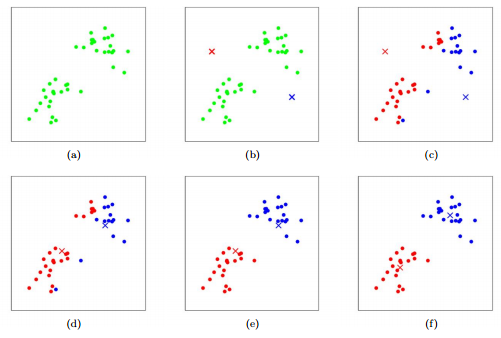

Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan

## Exercise 1: K-an You Do It? Yes You Can!

In the clustering problem, we are given a training set {x_1, x_2, ... x_m} and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point, x_i which real-values, as usual; but no labels y_i (making this an unsupervised learning problem). Our goal is to predict k centroids and a label c_i for each datapoint. The prediction, c_i is a cluster assignment for x_i . At a high level, the k-means clustering algorithm is as follows:



1.   Initialize **cluster centroids** $μ_1, μ_2, μ_3,....μ_k ∈ ℝ^n$ randomly
2.   Repeat until convergence: {


> For every i, set
>> $c^{(i)}:=arg \underset{j}{min} ||x^{(i)} - μ_j ||^2 $

> For every j, set
>> $μ_j := \frac{∑_{i=1}^m 1 \{c^{(i)} = j\} x^{(i)} }{∑_{i=1}^m 1 \{c^{(i)} = j\}} $

}




Functions to Implement:
*   Get Number of Features
*   Get Centroids
*   Get Random Centroids
*   Should Stop
*   Get Labels
*   K Means

### Function: Get Number of Features
Returns the number of features in the dataset. This corresponds to the number of columns in your dataSet array

In [ ]:
def getNumFeatures(dataSet):
  # Find the number of features in the dataset
  numFeatures = dataSet.shape[1]

  return numFeatures

### Function: Get Centroids
Returns k random centroids, each of dimension n. Each centroid is the mean of the points that have that centroid's label.

**Important**: If a centroid is empty (no points have that centroid's label) you should ramdonly re-initialize it.

In [ ]:
def getCentroids(dataSet, labels, k):
  #Compute/randomly initialize centroids
  num_features = dataSet.shape[1]
  centroids = np.zeros((k, num_features))

  for j in range(k):
      points_in_cluster = dataSet[labels == j]

      if len(points_in_cluster) == 0:
          # centroids[j] = dataSet[np.random.choice(dataSet.shape[0])]
          centroids[j] = getRandomCentroids(num_features, 1)[0]
      else:
          centroids[j] = points_in_cluster.mean(axis=0)

  return centroids

### Function: Get Labels
Returns a label for each piece of data in the dataset. For each element in the dataset, choose the closest centroid. Make that centroid the element's label.

In [ ]:
def getLabels(dataSet, centroids):
  labels = np.zeros(dataSet.shape[0], dtype=int)

  for i, dataPoint in enumerate(dataSet):
      distances = np.linalg.norm(dataPoint - centroids, axis=1)

      labels[i] = np.argmin(distances)

  return labels

### Function: Get Random Centroids
Randomly initialize the centroids with their corresponding dimensions

In [ ]:
def getRandomCentroids(numFeatures, k):
  centroids = np.random.rand(k, numFeatures)

  return centroids

### Function: Should Stop
Returns True or False if K-Means is done. K-Means terminates either because it has run a maximum number of iterations OR the centroids stop changing.

In [ ]:
def shouldStop(oldCentroids, centroids, iterations):
  if iterations > MAX_ITERATIONS:
    return True
  else:
    return (oldCentroids == centroids).all()
    # return np.allclose(oldCentroids, centroids, atol=1e-6)

### Function: K Means
K-Means is an algorithm that takes in a dataset and a constant k and returns k centroids (which define clusters of data in the dataset which are similar to one another).

In [ ]:
# def kmeans(dataSet, k):
#     # Initialize centroids randomly
#     numFeatures = getNumFeatures(dataSet)
#     centroids = getRandomCentroids(numFeatures, k)

#     # Initialize book keeping vars.
#     iterations = 0
#     oldCentroids = None

#     # Run the main k-means algorithm
#     while not shouldStop(oldCentroids, centroids, iterations):
#         # Save old centroids for convergence test. Book keeping.
#         oldCentroids = centroids
#         iterations += 1

#         # Assign labels to each datapoint based on centroids
#         labels = getLabels(dataSet, centroids)

#         # Assign centroids based on datapoint labels
#         centroids = getCentroids(dataSet, labels, k)

#     # We can get the labels too by calling getLabels(dataSet, centroids)
#     return centroids

def kmeans(dataSet, k):
    numFeatures = getNumFeatures(dataSet)
    centroids = getRandomCentroids(numFeatures, k)

    iterations = 0
    oldCentroids = None

    while not shouldStop(oldCentroids, centroids, iterations):
        oldCentroids = centroids
        iterations += 1

        labels = getLabels(dataSet, centroids)

        if iterations == 1 or iterations == 9:
            plotDataSet(f"Iteration {iterations}", dataSet, labels, centroids)

        centroids = getCentroids(dataSet, labels, k)

    plotDataSet(f"Final Clustering (Iteration {iterations})", dataSet, labels, centroids)

    return centroids

### Plot Function:
Below is a function that plots the dataset with the centroids, it takes in 4 arguments. You will use this function to plot the progress of your K-Means algorithm


1.   title: Graph Title
2.   dataSet: Dataset that's going to be plotted
3.   labels: The labels for the dataset.
4.   centroids: The centroids of the clusters.



In [ ]:
def plotDataSet(title, dataSet, labels, centroids):
  plt.title(title)
  array1 = None
  array2 = None
  array3 = None

  index = 0
  for label in labels:
    if label == 0:
      if array1 is None:
        array1 = dataSet[index]
      else:
        array1 = np.vstack((array1, dataSet[index]))
    if label == 1:
      if array2 is None:
        array2 = dataSet[index]
      else:
        array2 = np.vstack((array2, dataSet[index]))
    if label == 2:
      if array3 is None:
        array3 = dataSet[index]
      else:
        array3 = np.vstack((array3, dataSet[index]))
    index = index + 1
  plt.scatter(array1[:,0], array1[:,1], color="red", s=.2)
  plt.scatter(array2[:,0], array2[:,1], color="green", s=.2)
  plt.scatter(array3[:,0], array3[:,1], color="blue", s=.2)

  plt.scatter(centroids[0][0], centroids[0][1], color="darkred", marker='x', s=50)
  plt.scatter(centroids[1][0], centroids[1][1], color="darkgreen", marker='x', s=50)
  plt.scatter(centroids[2][0], centroids[2][1], color="midnightblue", marker='x', s=50)
  plt.show()

## Exercise 2
Generate a dataset called blobs with the following code:

In [ ]:
n_samples = 1500
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9, if the algorithm converges before 9, don't worry about plotting the 9th plot:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

To do this, you should use the plotDataSet function above. To make this easy, you should also modify the kmeans function above to periodically generate the plots.


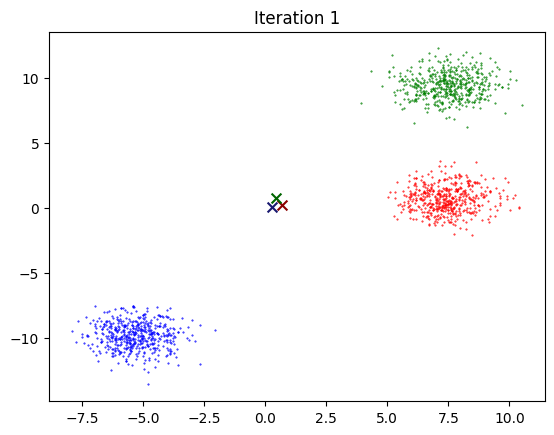

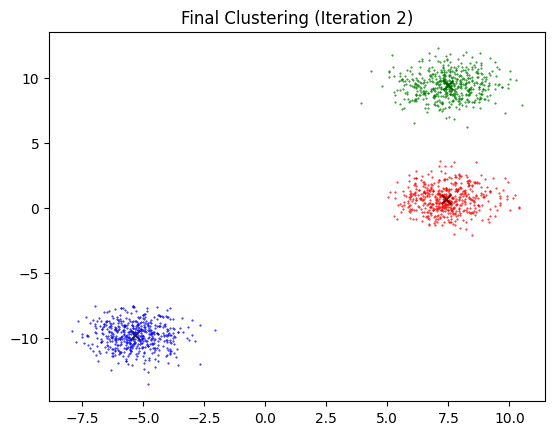

array([[ 7.41429427,  0.67834951],
       [ 7.47871593,  9.43027105],
       [-5.31738211, -9.81080765]])

In [ ]:
#Enter your code for exercise 2 here
kmeans(blobs, 3)

What do you notice about the predicted clusters as algorithm progresses?

As the algorithm progresses, the centroids quickly move from their initial random positions toward the true centers of the clusters. By Iteration 2, the algorithm has converged, and the data points are clearly grouped into their respective clusters with well-separated centroids.

Does the number of centroids, k=3 fit the data?

Yes, k=3 fits the data well. The dataset visually has three distinct clusters, and the algorithm successfully identifies them by placing one centroid in the center of each group.

Discuss the quality of the clustering.

The clustering is of high quality, with each centroid accurately representing the center of its cluster, and the data points within each cluster tightly grouped. The algorithm converged in just 2 iterations, demonstrating the effectiveness of k=3 for this dataset and the natural separation of the clusters.

## Exercise 3
Generate a dataset called noisy moons with the following code:

In [ ]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


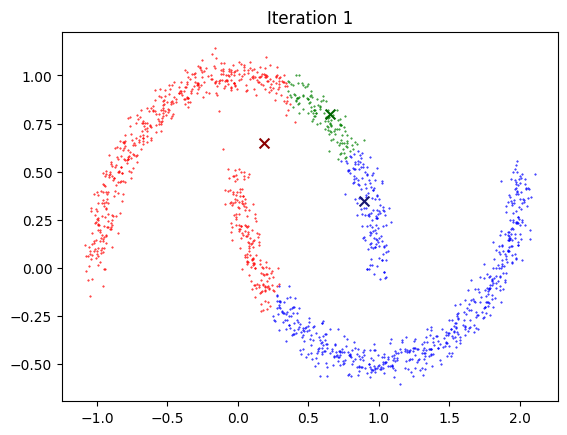

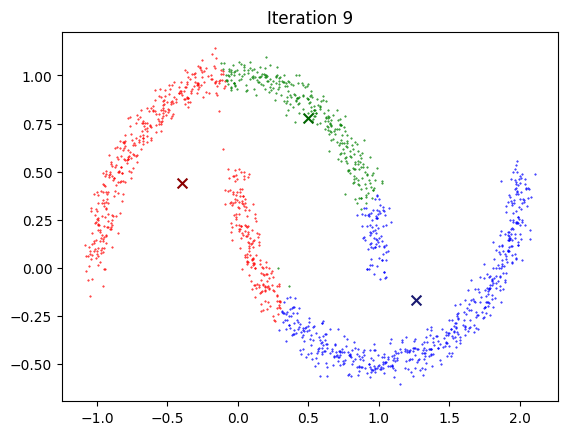

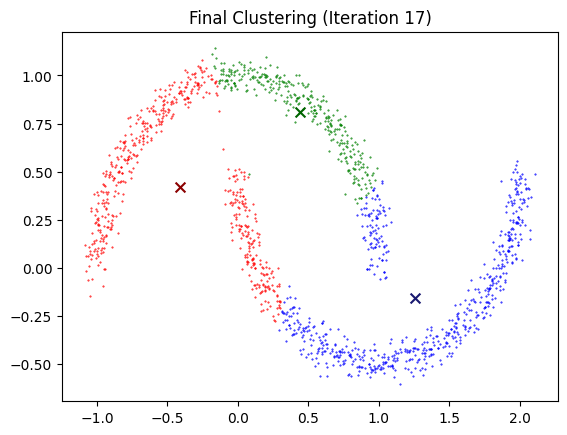

array([[-0.40924716,  0.41776746],
       [ 0.44115377,  0.81001506],
       [ 1.25991313, -0.15971189]])

In [ ]:
#Enter your code for exercise 3 here
kmeans(noisy_moons, 3)

What do you notice about the predicted clusters as algorithm progresses?

As the algorithm progresses, the centroids gradually move closer to the denser areas of their assigned clusters, attempting to split the curved structure into three parts. However, due to the crescent shapes of the clusters (non-spherical and non-linear), K-Means struggles to produce meaningful clusters and instead creates an arbitrary division based on proximity to the centroids.

Does the number of centroids, k=3 fit the data?

No, k=3 does not fit the data well. The dataset appears to have two distinct curved structures (representing two natural clusters), and the third centroid results in an artificial split that does not align with the underlying structure.

Discuss the quality of the clustering.

The quality of the clustering is poor because K-Means is not well-suited for this type of non-linear, crescent-shaped dataset. K-Means assumes spherical clusters and uses straight-line distances, which causes it to fail at correctly separating the two crescents. A more appropriate algorithm, such as DBSCAN or Spectral Clustering, would perform better on this dataset.

## Exercise 4
Discuss what you learned below

Through this exercise, I learned that K-Means clustering is effective for datasets with well-separated, spherical clusters but struggles with non-linear or irregularly shaped clusters. The algorithm relies on Euclidean distance to assign points to centroids, which works well for blobs but fails to capture complex structures like the crescent shapes in the noisy moons dataset. I also observed that the choice of k, the number of clusters, plays a critical role in the quality of the clustering results. When k matches the natural structure of the data, the clusters are meaningful and cohesive. However, for datasets with complex structures, alternative algorithms like DBSCAN or Spectral Clustering may provide better results.